## RNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

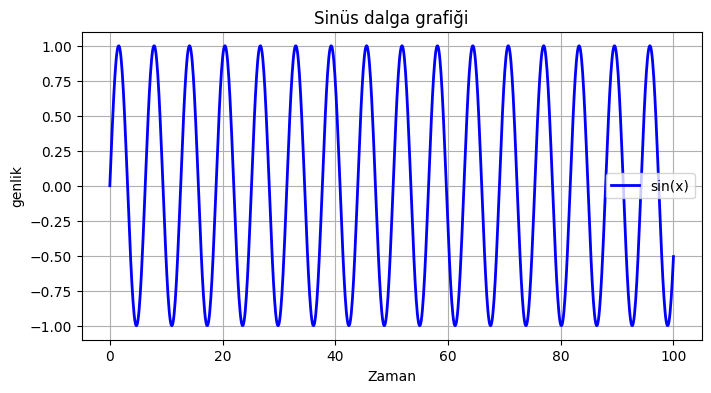

In [3]:
def generate_data(seq_length = 50, num_samples = 1000):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x)
    sequence = []
    targets = []

    for i in range(len(x) - seq_length):
        sequence.append(y[i:i+seq_length])
        targets.append(y[i + seq_length])

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label="sin(x)", color="b", linewidth=2)
    plt.title("Sinüs dalga grafiği")
    plt.xlabel("Zaman")
    plt.ylabel("genlik")
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.array(sequence), np.array(targets)

sequence, targets = generate_data()

In [5]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNN, self).__init__()

        # input_size: giris boyutu
        # hidden_size: cell sayisi
        # num_layers: rnn layers sayisi
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        # output_size: cikti boyutu
        self.fc = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])

        return x
    
model = RNN(input_size=1, hidden_size=16, output_size=1, num_layers=1)
model

RNN(
  (rnn): RNN(1, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

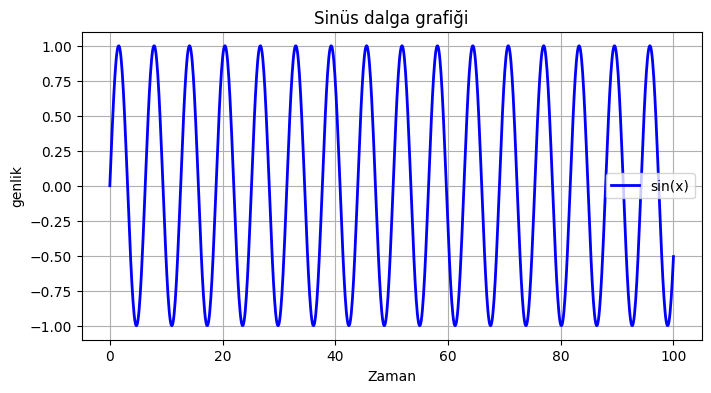

Epoch: 1 / 20, Loss: 0.4314
Epoch: 2 / 20, Loss: 0.0900
Epoch: 3 / 20, Loss: 0.0373
Epoch: 4 / 20, Loss: 0.0240
Epoch: 5 / 20, Loss: 0.0101
Epoch: 6 / 20, Loss: 0.0052
Epoch: 7 / 20, Loss: 0.0026
Epoch: 8 / 20, Loss: 0.0021
Epoch: 9 / 20, Loss: 0.0016
Epoch: 10 / 20, Loss: 0.0017
Epoch: 11 / 20, Loss: 0.0017
Epoch: 12 / 20, Loss: 0.0014
Epoch: 13 / 20, Loss: 0.0012
Epoch: 14 / 20, Loss: 0.0008
Epoch: 15 / 20, Loss: 0.0006
Epoch: 16 / 20, Loss: 0.0007
Epoch: 17 / 20, Loss: 0.0007
Epoch: 18 / 20, Loss: 0.0007
Epoch: 19 / 20, Loss: 0.0006
Epoch: 20 / 20, Loss: 0.0006


In [11]:
seq_length = 50
input_size = 1
hidden_size = 16
output_size = 1
num_layers = 1
epochs = 20
batch_size = 32
learning_rate = 1e-3

x, y = generate_data(seq_length=seq_length)
x = torch.tensor(x, dtype=torch.float32).unsqueeze(-1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

model = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    for batch_x, batch_y in dataloader:

        optimizer.zero_grad()
        output = model(batch_x)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch+1} / {epochs}, Loss: {loss.item():.4f}")

In [12]:
x_test1 = np.linspace(100, 110, seq_length).reshape(1, -1)
y_test1 = np.sin(x_test1)

x_test2 = np.linspace(120, 130, seq_length).reshape(1, -1)
y_test2 = np.sin(x_test2)

In [13]:
x_test1 = torch.tensor(y_test1, dtype=torch.float32).unsqueeze(-1)
x_test2 = torch.tensor(y_test2, dtype=torch.float32).unsqueeze(-1)

In [14]:
model.eval()
pred1 = model(x_test1).detach().numpy()
pred2 = model(x_test2).detach().numpy()

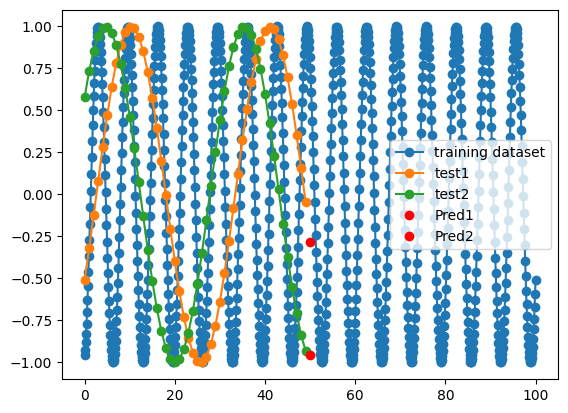

In [16]:
plt.figure()
plt.plot(np.linspace(0, 100, len(y)), y, marker = "o", label = "training dataset")
plt.plot(x_test1.numpy().flatten(), marker = "o", label = "test1")
plt.plot(x_test2.numpy().flatten(), marker = "o", label = "test2")

plt.plot(np.arange(seq_length, seq_length+1), pred1.flatten(), "ro", label = "Pred1")
plt.plot(np.arange(seq_length, seq_length+1), pred2.flatten(), "ro", label = "Pred2")

plt.legend()
plt.show()